# Comentarios para llevarse de la clase

- Los modelos son modelos y la realidad la realidad. Que coincidan o no es otro problema. Todos los detalles matematicos tecnicos son para validar la consistencia matematica del modelo, no de los datos.
- Una cosa es evaluar si el modelo es razonable y otra si los datos ajustan y son buenos predictores. Ejemplo Long-Lat en properati.
- En la presentacion hay codigos implementados a mano que despues vamos a usar ya implementados.

In [8]:
# Vamos a generar un dataset de juguete

import numpy as np
import pandas as pd
import seaborn as sns

In [110]:
N = 1000
x = 2 * np.random.random(N) - 1
b_0 = 340
b_1 = 73
factor_ruido = 1
factor_cuadratico = 0

y = b_0 + b_1*x + b_1*factor_ruido*(np.random.random(N)*2-1) + factor_cuadratico*b_1*x*x
data = pd.DataFrame({'Y':y,'X':x})


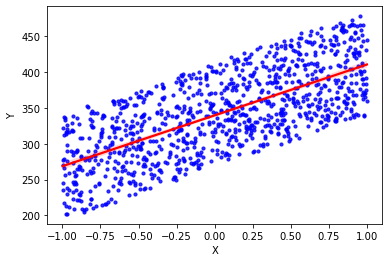

In [111]:
sns.regplot(data = data, x = "X", y = "Y", 
            ci = 95,
            scatter_kws = {"color": "blue", 's': 10},
            line_kws = {"color": "red"});   

In [112]:
beta_0 = b_0
beta_1 = b_1

mean_y = data['Y'].mean()


tss_i = data['X'].apply(lambda yi: (yi - mean_y) ** 2)
tss = tss_i.sum()

y_hat_i = beta_0 + beta_1 * data['X']


i_count = data.shape[0]
rss_i = [(data['Y'][i] - y_hat_i[i]) ** 2 for i in range(i_count)]
    
rss = sum(rss_i)


r2 = (tss - rss) / tss
print("R2: ", np.round(r2, 3))


R2:  0.985


In [73]:
from sklearn.linear_model import LinearRegression

[73.67738058]
338.2014821456966


<AxesSubplot:xlabel='X', ylabel='Y'>

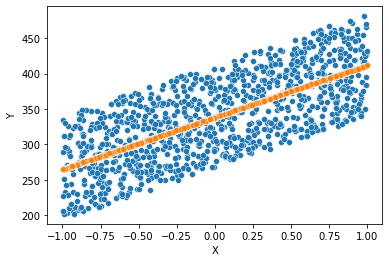

In [126]:
N = 1000
x = 2 * np.random.random(N) - 1
b_0 = 340
b_1 = 73
factor_ruido = 1
factor_cuadratico = 0

y = b_0 + b_1*x + b_1*factor_ruido*(np.random.random(N)*2-1) + factor_cuadratico*b_1*x*x
data = pd.DataFrame({'Y':y,'X':x})

model = LinearRegression()
X = data.drop(columns='Y')
y = data['Y']
model.fit(X,y)
print (model.coef_)
print (model.intercept_)


g = sns.scatterplot(x = data['X'], y=data['Y'])
y_hat = model.intercept_ + model.coef_[0] * data['X']
sns.scatterplot(x=data['X'], y = y_hat)


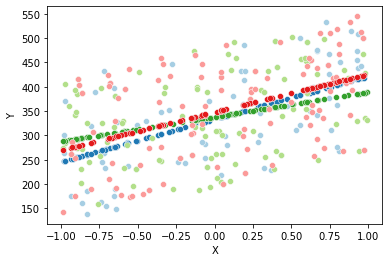

In [135]:
N = 1000
x = 2 * np.random.random(N) - 1
b_0 = 340
b_1 = 73
factor_ruido = 2
factor_cuadratico = 0

y = b_0 + b_1*x + b_1*factor_ruido*(np.random.random(N)*2-1) + factor_cuadratico*b_1*x*x
data = pd.DataFrame({'Y':y,'X':x})

m = 3
samples = 100
model = LinearRegression()
sns.set_palette(sns.color_palette("Paired"))

for i in range(m):
    data_red = data.sample(samples)
    X = data_red.drop(columns='Y')
    y = data_red['Y']
    model.fit(X,y)
    b_1_hat = model.coef_[0]
    b_0_hat = model.intercept_
    sns.scatterplot(x = data_red['X'], y=data_red['Y'])
    y_hat = b_0_hat + b_1_hat * data_red['X']
    sns.scatterplot(x=data_red['X'], y = y_hat)
